In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
df = pd.read_csv("tabpfn.csv", sep=";")
df

,ID,openmlid,seed,algorithm,creation_date,status,start_date,name,machine,test_accuracy,fitting_time,details,end_date,error
0,1,14,0,tabpfn,"10/25/2022, 04:54:10",done,"10/25/2022, 14:07:11",1165575,n2cn0536,0.8150,0.0,NaN,"10/25/2022, 14:09:22",NaN
1,2,14,1,tabpfn,"10/25/2022, 04:54:10",done,"10/25/2022, 14:17:01",1165578,n2cn0539,0.7960,0.0,NaN,"10/25/2022, 14:19:45",NaN
2,3,14,2,tabpfn,"10/25/2022, 04:54:10",done,"10/25/2022, 06:00:56",1164380,n2cn1134,0.8420,0.0,NaN,"10/25/2022, 06:03:17",NaN
3,4,14,3,tabpfn,"10/25/2022, 04:54:10",done,"10/25/2022, 14:02:17",1165572,n2cn0629,0.8210,0.0,NaN,"10/25/2022, 14:04:46",NaN
4,5,14,4,tabpfn,"10/25/2022, 04:54:10",done,"10/25/2022, 14:02:17",1165572,n2cn0629,0.8170,0.0,NaN,"10/25/2022, 14:04:51",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,41946,5,naiveautoml,"10/25/2022, 04:54:10",done,"10/25/2022, 14:02:19",1165576,n2cn0537,0.9769,309340.0,"[[0.024, 0.0852, 1.2347, 1.2789, 3.4492, 4.510...","10/25/2022, 14:07:30",NaN
2036,2037,41946,6,naiveautoml,"10/25/2022, 04:54:10",done,"10/25/2022, 14:05:39",1165577,n2cn0538,0.9773,277673.0,"[[0.0141, 0.1596, 3.5514, 3.637, 8.4359, 9.242...","10/25/2022, 14:10:19",NaN
2037,2038,41946,7,naiveautoml,"10/25/2022, 04:54:10",running,"10/25/2022, 14:33:34",1165575,n2cn0536,NaN,NaN,NaN,NaN,NaN
2038,2039,41946,8,naiveautoml,"10/25/2022, 04:54:10",done,"10/25/2022, 05:43:55",1164380,n2cn1134,0.9672,103143.0,"[[0.0615, 0.1084, 3.0577, 3.0847, 7.7376, 8.31...","10/25/2022, 05:45:39",NaN


In [13]:
comparisons = []
for openmlid, df_dataset in df.groupby("openmlid"):
    performances_tabpfn = df_dataset[df_dataset["algorithm"] == "tabpfn"]["test_accuracy"].dropna().values
    performances_naml = df_dataset[df_dataset["algorithm"] == "naiveautoml"]["test_accuracy"].dropna().values
    comparisons.append((np.mean(performances_tabpfn), np.mean(performances_naml)))
comparisons = np.array(comparisons)
comparisons

array([[0.8096    , 0.839     ],
       [0.95122222, 0.97325   ],
       [0.7367    , 0.7428    ],
       [0.8189    , 0.82233333],
       [0.96549   , 0.97167   ],
       [0.9672    , 0.96164   ],
       [0.98498889, 0.88466667],
       [0.97056667, 0.9680375 ],
       [0.94097   , 0.93293333],
       [0.8272    , 0.83071111],
       [0.85629   , 0.7840375 ],
       [0.58738   , 0.60147778],
       [0.887     , 0.8878125 ],
       [       nan, 0.7641    ],
       [       nan, 0.95444   ],
       [0.562     , 0.54953   ],
       [0.5355    , 0.48012857],
       [0.8415    , 0.91111111],
       [0.95644   , 0.95425   ],
       [0.72888889, 0.84357143],
       [0.92384   , 0.92198889],
       [0.988775  , 0.98961111],
       [0.87313333, 0.84885556],
       [0.91828889, 0.9108    ],
       [0.87077   , 0.85065556],
       [0.93      , 0.911875  ],
       [0.9525    , 0.940625  ],
       [0.90875   , 0.8775    ],
       [0.63422222, 0.85591   ],
       [0.9327    , 0.92666667],
       [0.

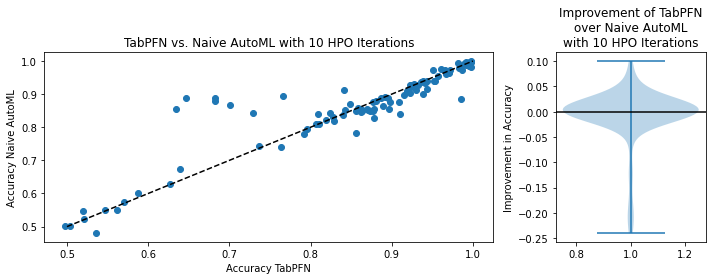

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [3, 1]})
ax = axs[0]
ax.scatter(comparisons[:,0], comparisons[:,1])
ax.plot([0.5, 1], [0.5, 1], linestyle="--", color="black")
ax.set_xlabel("Accuracy TabPFN")
ax.set_ylabel("Accuracy Naive AutoML")
ax.set_title("TabPFN vs. Naive AutoML with 10 HPO Iterations")

mask = ~(np.isnan(comparisons[:,0]) | np.isnan(comparisons[:,1]))
ax = axs[1]
ax.violinplot(comparisons[mask,0] - comparisons[mask,1])
ax.axhline(0, color="black")
ax.set_title("Improvement of TabPFN\nover Naive AutoML\nwith 10 HPO Iterations")
ax.set_ylabel("Improvement in Accuracy")
fig.tight_layout()